In [14]:
import pandas as pd
from sklearn import linear_model

In [5]:
df_canada_pci = pd.read_csv('Sampledata/canada_per_capita_income.txt')
df_canada_pci.head()


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [6]:
import matplotlib.pyplot as plt

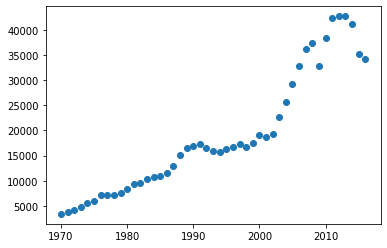

In [8]:
plt.scatter(df_canada_pci['year'], df_canada_pci['per capita income (US$)'])

In [10]:
reg = linear_model.LinearRegression()
reg.fit(df_canada_pci[['year']], df_canada_pci[['per capita income (US$)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.coef_

array([[828.46507522]])

In [12]:
reg.intercept_

array([-1632210.75785546])

In [27]:
reg.predict([[2020]])

array([[41288.69409442]])

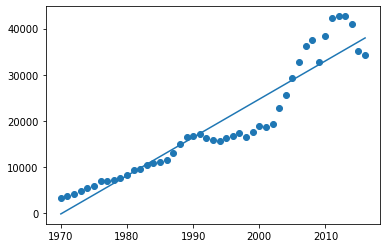

In [19]:
plt.scatter(df_canada_pci['year'], df_canada_pci['per capita income (US$)'])
plt.plot(df_canada_pci['year'], reg.predict(df_canada_pci[['year']]))

In [3]:
# Multi Variate LR
import pandas as pd
#load the test data
df_hiring = pd.read_csv('Sampledata/hiring.txt')
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df_hiring['experience'].fillna('Zero',  inplace=True)
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
from word2number import w2n

In [8]:
df_hiring['experience']=df_hiring['experience'].apply(w2n.word_to_num)

In [9]:
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [11]:
test_score_median = df_hiring['test_score(out of 10)'].median()

In [13]:
df_hiring['test_score(out of 10)'].fillna(test_score_median, inplace=True)
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [15]:
reg_mv = linear_model.LinearRegression()

In [17]:
reg_mv.fit(df_hiring[['experience','test_score(out of 10)','interview_score(out of 10)']],df_hiring['salary($)'] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg_mv.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [19]:
reg_mv.intercept_

17737.26346433768

In [20]:
reg_mv.predict([[2,9,6]])

array([53205.96797671])

In [21]:
reg_mv.predict([[12, 10,10]])

array([92002.18340611])

In [24]:
# Gradient Descent 

df_ts = pd.read_csv('Sampledata/test_scores.txt')
df_ts

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [25]:
x = df_ts['math']
y = df_ts['cs']

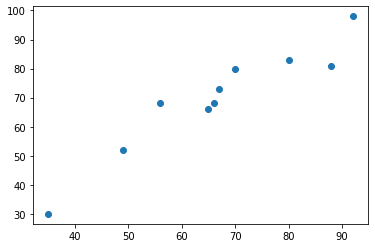

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

reg_ts = linear_model.LinearRegression()

In [52]:
reg_ts.fit(df_ts[['math']],df_ts['cs'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#plt.plot(df_canada_pci['year'], reg.predict(df_canada_pci[['year']]))
reg_ts.coef_

array([1.01773624])

In [55]:
reg_ts.intercept_

1.9152193111569318

In [56]:
reg_ts.predict([[87]])

array([90.458272])

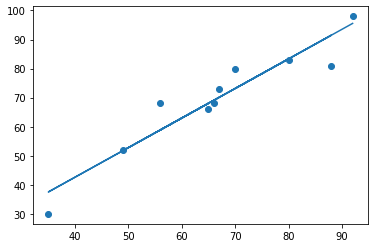

In [61]:
plt.scatter(x,y)
plt.plot(df_ts[['math']], reg_ts.predict(df_ts[['math']]))


In [62]:
print('Coeff using scikit {}, intercept using scikit {}'. format(reg_ts.coef_, reg_ts.intercept_))

Coeff using scikit [1.01773624], intercept using scikit 1.9152193111569318


In [67]:
import numpy as np
import math
x = np.array(df_ts['math'])    
y = np.array(df_ts['cs'])


[92 56 88 70 80 49 65 35 66 67] [98 68 81 80 83 52 66 30 68 73]


'\n y_predicted = m_curr * x + b_curr\n        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])\n        md = -(2/n)*sum(x*(y-y_predicted))\n        bd = -(2/n)*sum(y-y_predicted)\n        m_curr = m_curr - learning_rate * md\n        b_curr = b_curr - learning_rate * bd\n'

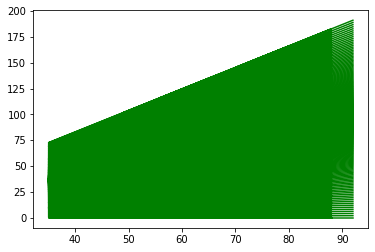

In [96]:
# manually calculate the gradient descent

""" need : MSE wrt m and b 
change in m = -(2/n) * sum(x*(y - y_predict))
change in b = -(2/n) * sum(y - y_predict) 
cost function = (1/n)* sum([val**2 for val in (y - y_predict)])
learning rate, upd m and b, number of iteration

"""

def gradient_des(x,y):
    m_curr = b_curr =0
    iterate = 10000
    lr = 0.00021
    n = len(x)
    cost_prev =0
    for i in range(iterate):
        y_predict = m_curr * x + b_curr
        plt.plot(x,y_predict,color='green')
        cost = (1/n) * sum([val**2 for val in (y-y_predict)])
        md = -(2/n) * sum(x*(y - y_predict))         
        bd = -(2/n) * sum((y - y_predict))
        
        m_curr = m_curr - lr * md
        b_curr = b_curr - lr * bd
        
        if math.isclose(cost, cost_prev,rel_tol=1e-20):
            break
        cost_prev = cost
        #print('prediceted m {}, predicted b {}, cost {}'. format(m_curr, b_curr, cost))
        
    

print(x,y)
gradient_des(x,y)
        
    
    

    


In [97]:
"""
 y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
"""    
    

'\n y_predicted = m_curr * x + b_curr\n        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])\n        md = -(2/n)*sum(x*(y-y_predicted))\n        bd = -(2/n)*sum(y-y_predicted)\n        m_curr = m_curr - learning_rate * md\n        b_curr = b_curr - learning_rate * bd\n'

In [98]:
import pickle

with open ('model_pickle', 'wb') as f:
    pickle.dump(reg_mv, f)

In [99]:
with open('model_pickle', 'rb') as rf:
    mv = pickle.load(rf)

In [102]:
mv.predict([[12,10,10]])

array([92002.18340611])

In [103]:
# Train test Split

from sklearn.model_selection import train_test_split

In [105]:
df_cp = pd.read_csv('Sampledata/carprices.txt')
df_cp.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [106]:
X = df_cp[['Mileage','Age(yrs)']]
y = df_cp['Sell Price($)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [112]:
X_test.shape


(6, 2)

In [113]:
reg_cp = linear_model.LinearRegression()

In [114]:
reg_cp.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
reg_cp.predict(X_test)

array([28215.12274097, 14266.21525287, 18555.51579457, 21043.13989793,
       15491.35523094, 37730.5955723 ])

In [117]:
y_test

6     32000
8     12000
11    19500
7     19300
18    12800
15    35000
Name: Sell Price($), dtype: int64

In [118]:
reg_cp.score(X_test, y_test)

0.9184087228360774

In [119]:
# OneHotEncoding

df_cp_ohe = pd.read_csv('Sampledata/carprices_ohe.txt')
df_cp_ohe

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [120]:
dum = pd.get_dummies(df_cp_ohe['Car Model'])

In [121]:
dum

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [122]:
type(dum)

pandas.core.frame.DataFrame

In [125]:
dum.drop('Mercedez Benz C class', axis ='columns', inplace=True)

In [126]:
dum

,Audi A5,BMW X5
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


In [131]:
df_cp_ohe = pd.concat([df_cp_ohe, dum], axis ='columns')

In [132]:
df_cp_ohe

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,BMW X5,69000,18000,6,0,1
1,BMW X5,35000,34000,3,0,1
2,BMW X5,57000,26100,5,0,1
3,BMW X5,22500,40000,2,0,1
4,BMW X5,46000,31500,4,0,1
5,Audi A5,59000,29400,5,1,0
6,Audi A5,52000,32000,5,1,0
7,Audi A5,72000,19300,6,1,0
8,Audi A5,91000,12000,8,1,0
9,Mercedez Benz C class,67000,22000,6,0,0


In [134]:
# drop the original catigorical column
df_cp_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
 4   Audi A5        13 non-null     uint8 
 5   BMW X5         13 non-null     uint8 
dtypes: int64(3), object(1), uint8(2)
memory usage: 570.0+ bytes


In [137]:
df_cp_ohe.drop(['Car Model'], axis = 'columns', inplace= True)

In [138]:
df_cp_ohe

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [142]:
# get the features for X and y

#X = df_cp_ohe[['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5']]

#or
X = df_cp_ohe.drop(['Sell Price($)'], axis = 'columns')

In [143]:
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [144]:
y = df_cp_ohe['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [145]:
reg_cp_ohe = linear_model.LinearRegression()

In [146]:
reg_cp_ohe.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
reg_cp_ohe.predict([[45000, 4, 0,0]])

array([36991.31721061])

In [148]:
reg_cp_ohe.predict([[86000, 7, 0,1]])

array([11080.74313219])

In [149]:
reg_cp_ohe.score(X,y)

0.9417050937281083

In [150]:
# method -2 use sklearn.lableEncoder and OneHotEncoder

# step -1 : encode the categorical values to int

from sklearn.preprocessing import LabelEncoder

In [151]:
le = LabelEncoder()

In [154]:
df_le = pd.read_csv('Sampledata/carprices_ohe.txt')
df_le

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [155]:
le.fit_transform(df_le['Car Model']) # change the categorical value to integer groups

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [156]:
df_le['Car Model'] = le.fit_transform(df_le['Car Model']) # assign the int value to the original DF

In [157]:
df_le

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [204]:
#X_le = df_le.drop(['Sell Price($)'], axis='columns').values
X_le = df_le[['Car Model']]
X_le

,Car Model
0,1
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,2


In [184]:
y_le = df_le['Sell Price($)']
y_le

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [185]:
# Step-2 : do one hot encoding 

In [244]:
from sklearn.preprocessing import OneHotEncoder

In [245]:
#ohe = OneHotEncoder() # not required instead use Columntransformer as below

In [246]:
#X_le = ohe.fit_transform(X_le).toarray() # not required instead use Columntransformer as below

In [247]:
#X_le = X_le[:,1:] # not required instead use Columntransformer as below
#X_le

In [256]:
# LableEncoder is to convert the categorical value (string) into integer type (0,1,2)
# OneHotEncoder is to convert the above integer groups into binary form of encoders 001, 100, 010 - "dummy features"
# column transformer is to create the onehotencoder object with specific column containing the categirical value
# then using the object - fit_transform the input features and use it in the model

In [255]:
from sklearn.compose import ColumnTransformer 
   
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
cT = ColumnTransformer([('car', OneHotEncoder(),[0])], remainder='passthrough') 
 
data = cT.fit_transform(df_le.drop(['Sell Price($)'], axis='columns')) # pass only the the input features 


#data = np.array(columnTransformer.fit_transform(df_le.drop(['Sell Price($)'], axis='columns')), dtype = np.str) 
# or 

In [249]:
data

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [260]:
data = data[:, 1:] # drop one column from the result to avoid dummy varable trap
data

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [261]:
# apply the above transformed data to train the reg model and predict the values
reg_cp_ohe.fit(data,y_le)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
reg_cp_ohe.predict([[0,1,45000, 4]])

array([36991.31721062])

In [263]:
reg_cp_ohe.predict([[1,0,86000, 7]])

array([11080.74313219])

In [254]:
reg_cp_ohe.score(data, y_le)

0.9417050937281083